# Big Mart Sales Prediction

**Kyu Cho  
October 14, 2016**

# Introduction

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.  
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.  

# Variables

We have train (8523) and test (5681) data set.
- Variable = Description  
- Item_Identifier = Unique product ID  
- Item_Weight = Weight of product  
- Item_Fat_Content = Whether the product is low fat or not  
- Item_Visibility = The % of total display area of all products in a store allocated to the particular product    
- Item_Type = The category to which the product belongs  
- Item_MRP = Maximum Retail Price (list price) of the product  
- Outlet_Identifier = Unique store ID  
- Outlet_Establishment_Year = The year in which store was established  
- Outlet_Size = The size of the store in terms of ground area covered  
- Outlet_Location_Type = The type of city in which the store is located  
- Outlet_Type = Whether the outlet is just a grocery store or some sort of supermarket
- Item_Outlet_Sales = Sales of the product in the particulat store. This is the outcome variable to be predicted.  

# Table of Contents

1. Hypothesis Generation : understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration : looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning : imputing missing values in the data and checking for outliers
4. Feature Engineering : modifying existing variables and creating new ones for analysis
5. Model Building : making predictive models on the data

# 1. Hypothesis Generation

**Store Level Hypotheses**  
**City type**: Stores located in urban or Tier 1 cities should have higher sales because of the higher income levels of people there.  
**Population Density**: Stores located in densely populated areas should have higher sales because of more demand.  
**Store Capacity**: Stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place  
**Competitors**: Stores having similar establishments nearby should have less sales because of more competition.  
**Marketing**: Stores which have a good marketing division should have higher sales as it will be able to attract customers through the right offers and advertising.  
**Location**: Stores located within popular marketplaces should have higher sales because of better access to customers.  
**Customer Behavior**: Stores keeping the right set of products to meet the local needs of customers will have higher sales.  
**Ambiance**: Stores which are well-maintained and managed by polite and humble people are expected to have higher footfall and thus higher sales.  

**Product Level Hypotheses**  
**Brand**: Branded products should have higher sales because of higher trust in the customer.  
**Packaging**: Products with good packaging can attract customers and sell more.  
**Utility**: Daily use products should have a higher tendency to sell as compared to the specific use products.  
**Display Area**: Products which are given bigger shelves in the store are likely to catch attention first and sell more.  
**Visibility in Store**: The location of product in a store will impact sales. Ones which are right at entrance will catch the eye of customer first rather than the ones in back.  
**Advertising**: Better advertising of products in the store will should higher sales in most cases.  
**Promotional Offers**: Products accompanied with attractive offers and discounts will sell more.  
These are just some basic 15 hypothesis I have made, but you can think further and create some of your own. Remember that the data might not be sufficient to test all of these, but forming these gives us a better understanding of the problem and we can even look for open source information if available.  

# 2. Data Exploration

In [1]:
import os
os.chdir('C:\Users\Kyu\Google Drive\Portfolio\project 105')

In [2]:
import pandas as pd
import numpy as np

# Read files:
train = pd.read_csv("train.csv", low_memory=False)
test = pd.read_csv("test.csv", low_memory=False)

In [3]:
train[:5]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# check discrepancy btw two sets
train.columns.equals(test.columns)

False

In [5]:
# check different column
train.columns.difference(test.columns)

Index([u'Item_Outlet_Sales'], dtype='object')

In [6]:
# combine two sets
train['source'] = 'train'
test['source'] = 'test'
data = pd.concat([train, test], ignore_index=True)
print train.shape, test.shape, data.shape

(8523, 13) (5681, 12) (14204, 13)


In [7]:
data.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


**Item_Visibility** has a min value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.
**Outlet_Establishment_Years** vary from 1985 to 2009. The values might not be apt in this form. Rather, if we can convert them to how old the particular store is, it should have a better impact on sales.

In [8]:
data.columns

Index([u'Item_Fat_Content', u'Item_Identifier', u'Item_MRP',
       u'Item_Outlet_Sales', u'Item_Type', u'Item_Visibility', u'Item_Weight',
       u'Outlet_Establishment_Year', u'Outlet_Identifier',
       u'Outlet_Location_Type', u'Outlet_Size', u'Outlet_Type', u'source'],
      dtype='object')

In [9]:
data.dtypes

Item_Fat_Content              object
Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
Outlet_Location_Type          object
Outlet_Size                   object
Outlet_Type                   object
source                        object
dtype: object

In [10]:
# check missing value
data.apply(lambda x: sum(x.isnull()))

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

In [11]:
# check factor variable levels
data.apply(lambda x: len(x.unique()))

Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3494
Item_Type                       16
Item_Visibility              13006
Item_Weight                    416
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      4
Outlet_Type                      4
source                           2
dtype: int64

- 1559 products  
- 10 outlets/stores 
- Item_Type has 16 unique values.  
Let’s explore further using the frequency of different categories in each nominal variable.  

In [12]:
# Filter categorical variables
categorical_columns = [x for x in data.columns if data.dtypes[x] == 'object']

# Exclude ID cols and source:
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier','Outlet_Identifier','source']]

# Frequency table 
print("Frequency Table")
for col in categorical_columns:
    print('\nFrequency table for varible %s' % col)
    print(data[col].value_counts(sort=True, dropna=False))

Frequency Table

Frequency table for varible Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency table for varible Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency table for varible Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

Frequency table for varible Outlet_Size
Medium    4655
NaN       4016
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

Fr

**Item_Fat_Content**: Some of ‘Low Fat’ values mis-coded as ‘low fat’ and ‘LF’. Also, some of ‘Regular’ are mentioned as ‘regular’.  
**Item_Type**: Not all categories have substantial numbers. It looks like combining them can give better results.  
**Outlet_Type**: Supermarket Type2 and Type3 can be combined. But we should check if that’s a good idea before doing it.  

In [13]:
# low fat, Lf = Low Fat
# reg = Ragular 
data['Item_Fat_Content'].replace({'LF': 'Low Fat', 
                                  'low fat': 'Low Fat', 
                                  'reg':'Regular'}, inplace=True)
data["Item_Fat_Content"].value_counts(sort=True, dropna=False)

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [14]:
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt

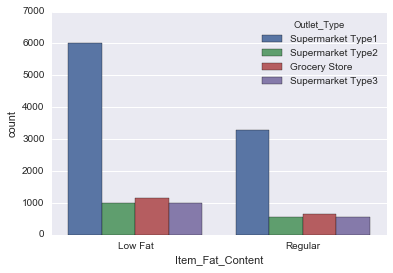

In [15]:
sns.countplot(x="Item_Fat_Content", hue="Outlet_Type", data=data);

- Supermarket Type 1 sells the most low fat products. 

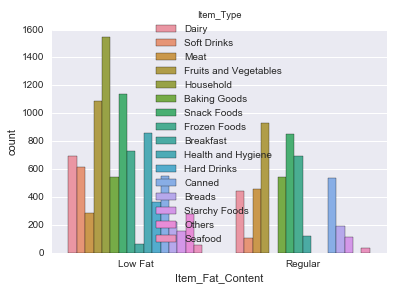

In [16]:
sns.countplot(x="Item_Fat_Content",  hue="Item_Type", data=data);

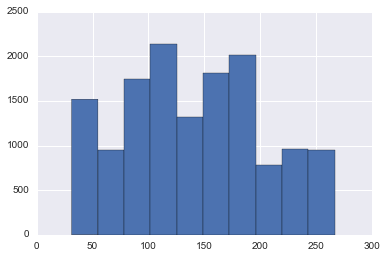

In [17]:
data['Item_MRP'].hist()

- Data looks normally distributed. Don't have to worry about skewness

# 3. Data Cleaning

## Imputing Missing Values
### 'Item_Weight'

In [18]:
# table avg. weight per item
# data.pivot_table(values='Item_Weight', index='Item_Identifier')
item_avg_weight = data.groupby("Item_Identifier").Item_Weight.mean()

# get null index
miss_idx = data['Item_Weight'].isnull() 

print('Orignal #missing: %d' % sum(miss_idx))

# input missing data
data.loc[miss_idx, 'Item_Weight'] = data.loc[miss_idx, 'Item_Identifier'].apply(lambda x: item_avg_weight[x])
print('Final # missing: %d' % sum(data['Item_Weight'].isnull()))

Orignal #missing: 2439
Final # missing: 0


### 'Outlet_Size'

In [19]:
from scipy.stats import mode

# determine the mode for each
outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x:mode(x).mode[0]))
print('Mode for each Outlet_Type:')
print(outlet_size_mode)

# get null index
miss_idx = data['Outlet_Size'].isnull() 

# input missing data
print('\nOrignal #missing: %d' % sum(miss_idx))
data.loc[miss_idx, 'Outlet_Size'] = data.loc[miss_idx, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
print('Final # missing: %d' % sum(data['Outlet_Size'].isnull()))

Mode for each Outlet_Type:
Outlet_Type
Grocery Store         Small
Supermarket Type1     Small
Supermarket Type2    Medium
Supermarket Type3    Medium
Name: Outlet_Size, dtype: object

Orignal #missing: 4016
Final # missing: 0


C:\Users\Kyu\Anaconda2\lib\site-packages\scipy\stats\stats.py:257: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)
C:\Users\Kyu\Anaconda2\lib\site-packages\numpy\lib\arraysetops.py:200: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


# 4. Feature Engineering

## Step 1: Consider combining Outlet_Type

In [20]:
# data.pivot_table(values='Item_Outlet_Sales', index='Outlet_Type')
data.groupby('Outlet_Type').Item_Outlet_Sales.mean()

Outlet_Type
Grocery Store         339.828500
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Supermarket Type3    3694.038558
Name: Item_Outlet_Sales, dtype: float64

Looks fine

## Step 2: Modify Item_Visibility

We noticed that the minimum value here is 0, which makes no practical sense.  
Lets consider it like missing information and impute it with mean visibility of that product.

In [21]:
# determine average visibility of a product
# data.pivot_table(values='Item_Visibility', index='Item_Identifier')
visibility_avg = data.groupby('Item_Identifier').Item_Visibility.mean()

# impute 0 values with mean visibility of that product
miss_idx = (data['Item_Visibility'] == 0)

print 'Number of 0 values initially: %d' % sum(miss_idx)
data.loc[miss_idx, 'Item_Visibility'] = data.loc[miss_idx, 'Item_Identifier'].apply(lambda x: visibility_avg[x])
print 'Number of 0 values after modification: %d' % sum(data['Item_Visibility'] == 0)

Number of 0 values initially: 879
Number of 0 values after modification: 0


In step 1, we hypothesized that products with higher visibility are likely to sell more.  
But along with comparing products on absolute terms, we should look at the visibility of the product in that particular store as compared to the mean visibility of that product across all stores. This will give some idea about how much importance was given to that product in a store as compared to other stores. We can use the ‘visibility_avg’ variable made above to achieve this.,

In [22]:
# Determine another variable with means ratio
data['Item_Visibility_MeanRatio'] = data.apply(lambda x: x['Item_Visibility']/visibility_avg[x['Item_Identifier']], axis=1)
print data['Item_Visibility_MeanRatio'].describe()

count    14204.000000
mean         1.061884
std          0.235907
min          0.844563
25%          0.925131
50%          0.999070
75%          1.042007
max          3.010094
Name: Item_Visibility_MeanRatio, dtype: float64


Thus the new variable has been successfully created. Again, this is just 1 example of how to create new features. I highly  encourage you to try more of these, as good features can drastically improve model performance and they invariably prove to be the difference between the best and the average model.

## Step 3: Create a broad category of type of item

- Combine the Item_Type variable (16 categories)
- The unique ID of each item starts with either FD, DR or NC
    + these look like being Food, Drinks and Non-Consumables
    + use the Item_Identifier variable to create a new column

In [23]:
# get the first two characters of ID
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])

# rename them to more intuitive categories
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

## Step 4: Combine categories based on sales
- The ones with high average sales could be combined together

In [24]:
# get idx of train part
train_idx = (data['source'] == 'train')

# subset the data
sub_data = data.loc[train_idx, ['Item_Identifier', 'Item_Outlet_Sales']]

# get avg. item sales by item_Identifier
item_avg_sales = sub_data.groupby("Item_Identifier").Item_Outlet_Sales.mean()

# extract the avg. sale percentile to group them into four categories
percentile = np.percentile(item_avg_sales, np.arange(0, 100, 25))
twentyfive = percentile[1]
fifty = percentile[2]
seventyfive = percentile[3]

# extract the Item_Identifier idx that fall between those percentiles
first_idx = item_avg_sales.apply(lambda x: x < twentyfive)
second_idx = item_avg_sales.apply(lambda x: x >= twentyfive and x < fifty)
third_idx = item_avg_sales.apply(lambda x: x >= fifty and x < seventyfive)
fourth_idx = item_avg_sales.apply(lambda x: x > seventyfive)

# extract the Item_Identifier names for each percentiles
first = item_avg_sales.loc[first_idx, ].index.values
second = item_avg_sales.loc[second_idx, ].index.values
thrid = item_avg_sales.loc[third_idx, ].index.values
fourth = item_avg_sales.loc[fourth_idx, ].index.values

# function to categorize each row
def id_to_percentile(x):
    if x in first:
        return('first')
    elif x in second:
        return('second')
    elif x in thrid:
        return('thrid')
    elif x in fourth:
        return('fourth')

data['Percentile'] = data['Item_Identifier'].apply(lambda x: id_to_percentile(x))

In [25]:
data['Percentile'].value_counts()

first     3580
second    3567
thrid     3556
fourth    3501
Name: Percentile, dtype: int64

## Step 5: Determine the years of operation of a store

- Create a new column depicting the years of operation of a store.

In [26]:
# Years, since the data is collected in 2013, we use 2013 as a starting year
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

## Step 6: Modify categories of Item_Fat_Content

- In step 3, there were some non-consumables as well and a fat-content should not be specified for them.
    + create a separate category for such kind of observations.

In [27]:
# get idx for Non-consumable row
NC_idx = (data['Item_Type_Combined'] == "Non-Consumable")

# create new categories
data.loc[NC_idx, 'Item_Fat_Content'] = "Non-Edible"

data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

## Step 7: One-Hot Enoding  for Categorical variables

In [28]:
np.array(data.select_dtypes(include=["object_"]).columns)

array(['Item_Fat_Content', 'Item_Identifier', 'Item_Type',
       'Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Size',
       'Outlet_Type', 'source', 'Item_Type_Combined', 'Percentile'], dtype=object)

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content', 'Outlet_Location_Type', 'Outlet_Size', 'Item_Type_Combined', 'Outlet_Type', 'Outlet', 'Percentile']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [30]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Visibility_MeanRatio,Item_Type_Combined,Percentile,Outlet_Years,Outlet
0,0,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,0,1,1,train,0.931078,1,1,14,9
1,2,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,2,1,2,train,0.933420,0,0,4,3
2,0,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,0,1,1,train,0.960069,1,2,14,9
3,2,FDX07,182.0950,732.3800,Fruits and Vegetables,0.017834,19.20,1998,OUT010,2,2,0,train,1.000000,1,1,15,0
4,1,NCD19,53.8614,994.7052,Household,0.009780,8.93,1987,OUT013,2,0,1,train,1.000000,2,0,26,1


In [31]:
# one-hot-encoding
data = pd.get_dummies(data, columns=['Item_Fat_Content', 'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type',
                              'Item_Type_Combined', 'Outlet', 'Percentile'])

In [32]:
data.dtypes

Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
source                        object
Item_Visibility_MeanRatio    float64
Outlet_Years                   int64
Item_Fat_Content_0           float64
Item_Fat_Content_1           float64
Item_Fat_Content_2           float64
Outlet_Location_Type_0       float64
Outlet_Location_Type_1       float64
Outlet_Location_Type_2       float64
Outlet_Size_0                float64
Outlet_Size_1                float64
Outlet_Size_2                float64
Outlet_Type_0                float64
Outlet_Type_1                float64
Outlet_Type_2                float64
Outlet_Type_3                float64
Item_Type_Combined_0         float64
Item_Type_Combined_1         float64
Item_Type_Combined_2         float64
O

## Step 8: Exporting Data

- Convert data back into train and test data sets.

In [33]:
# drop the columns which have been converted to different types
data.drop(['Item_Type', 'Outlet_Establishment_Year'], axis=1, inplace=True)

# divide into test and train
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

# drop unnecessary columns
test.drop(['Item_Outlet_Sales', 'source'], axis=1, inplace=True)
train.drop(['source'], axis=1, inplace=True)

# export files as modified versions
train.to_csv("train_modified.csv", index=False)
test.to_csv("test_modified.csv", index=False)

C:\Users\Kyu\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Kyu\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# Model Building

## Define a generic Function

In [34]:
from sklearn import cross_validation, metrics

# Define target and ID columns:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']

def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    # Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    # Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    # Perform cross-validation:
    cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], 
                                                dtrain[target], 
                                                cv=20, 
                                                scoring='mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    # Print model report:
    print "\nModel Report"
    print "RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain[target].values, 
                                                             dtrain_predictions))
    print "CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score), 
                                                                             np.std(cv_score),
                                                                             np.min(cv_score),
                                                                             np.max(cv_score))
    
    # Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
    # Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)

## 1. Base Model

In [35]:
# Mean based:
mean_sales = train['Item_Outlet_Sales'].mean()

# Define a dataframe with IDs for submission:
base1 = test[['Item_Identifier','Outlet_Identifier']]
base1.loc['Item_Outlet_Sales'] = mean_sales

# Export submission file
# base1.to_csv("alg0.csv",index=False)

C:\Users\Kyu\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Public LB Score: 1202

## 2. Linear Regression

In [36]:
IDcol

['Item_Identifier', 'Outlet_Identifier']


Model Report
RMSE : 1077
CV Score : Mean - 1079 | Std - 41.4 | Min - 1022 | Max - 1168


C:\Users\Kyu\Anaconda2\lib\site-packages\ipykernel\__main__.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


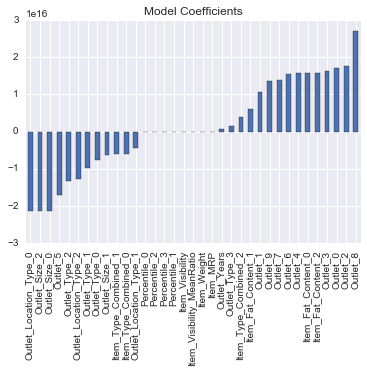

In [37]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

predictors = [x for x in train.columns if x not in [target] + IDcol]

alg1 = LinearRegression(normalize=True)
modelfit(alg1, train, test, predictors, target, IDcol, 'alg1.csv')

coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

### Public LB Score: 1202

# 3. Ridge Regression


Model Report
RMSE : 1076
CV Score : Mean - 1078 | Std - 41.79 | Min - 1022 | Max - 1168


C:\Users\Kyu\Anaconda2\lib\site-packages\ipykernel\__main__.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


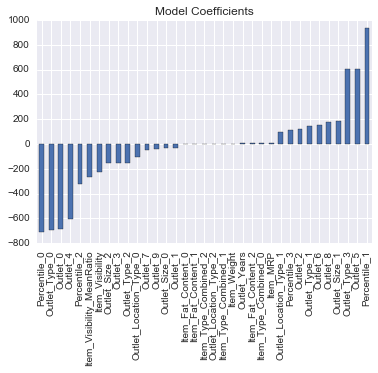

In [38]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

predictors = [x for x in train.columns if x not in [target] + IDcol]

alg2 = Ridge(alpha=0.05, 
             normalize=True)
modelfit(alg2, train, test, predictors, target, IDcol, 'alg2.csv')

coef2 = pd.Series(alg2.coef_, predictors).sort_values()
coef2.plot(kind='bar', title='Model Coefficients')

## 3. Decision Tree


Model Report
RMSE : 1001
CV Score : Mean - 1030 | Std - 40.27 | Min - 963.4 | Max - 1113


C:\Users\Kyu\Anaconda2\lib\site-packages\ipykernel\__main__.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


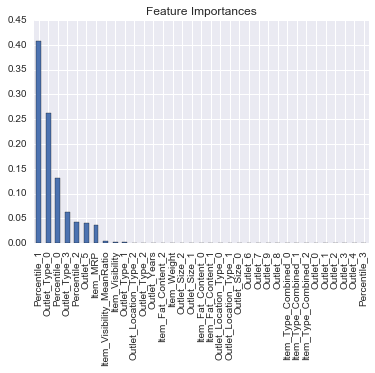

In [39]:
from sklearn.tree import DecisionTreeRegressor

predictors = [x for x in train.columns if x not in [target] + IDcol]

alg3 = DecisionTreeRegressor(max_depth=15, 
                             min_samples_leaf=100)
modelfit(alg3, train, test, predictors, target, IDcol, 'alg3.csv')

coef3 = pd.Series(alg3.feature_importances_, predictors).sort_values(ascending=False)
coef3.plot(kind='bar', title='Feature Importances')

### Public LB Score: 1162

- RMSE is 1058 and the mean CV error is 1091. 
    + slightly overfitting. 
        + try making a decision tree with just top 4 variables, a max_depth of 8 and min_samples_leaf as 150


Model Report
RMSE : 1071
CV Score : Mean - 1096 | Std - 43.3 | Min - 1027 | Max - 1172


C:\Users\Kyu\Anaconda2\lib\site-packages\ipykernel\__main__.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


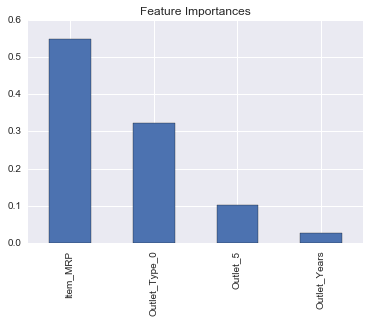

In [40]:
predictors = ['Item_MRP','Outlet_Type_0','Outlet_5','Outlet_Years']

alg4 = DecisionTreeRegressor(max_depth=8, 
                             min_samples_leaf=150)
modelfit(alg4, train, test, predictors, target, IDcol, 'alg4.csv')

coef4 = pd.Series(alg4.feature_importances_, predictors).sort_values(ascending=False)
coef4.plot(kind='bar', title='Feature Importances')

### Public LB Score: 1157

## 4. Random Forest


Model Report
RMSE : 1027
CV Score : Mean - 1033 | Std - 39.18 | Min - 960.6 | Max - 1121


C:\Users\Kyu\Anaconda2\lib\site-packages\ipykernel\__main__.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


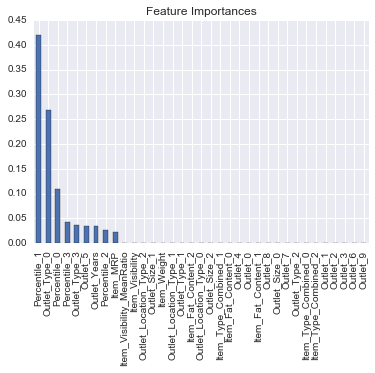

In [41]:
from sklearn.ensemble import RandomForestRegressor

predictors = [x for x in train.columns if x not in [target] + IDcol]

alg5 = RandomForestRegressor(n_estimators=200, 
                             max_depth=5, 
                             min_samples_leaf=100, 
                             n_jobs=4)
modelfit(alg5, train, test, predictors, target, IDcol, 'alg5.csv')

coef5 = pd.Series(alg5.feature_importances_, predictors).sort_values(ascending=False)
coef5.plot(kind='bar', title='Feature Importances')

### Public LB Score: 1154
- Try making another random forest with max_depth of 6 and 400 trees. 


Model Report
RMSE : 1017
CV Score : Mean - 1028 | Std - 38.11 | Min - 952.2 | Max - 1109


C:\Users\Kyu\Anaconda2\lib\site-packages\ipykernel\__main__.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


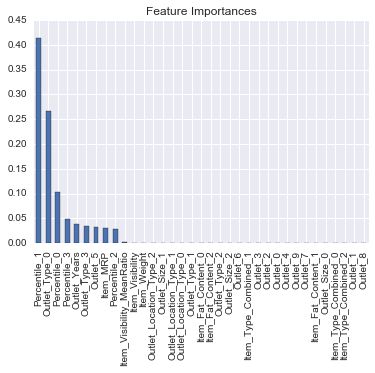

In [42]:
predictors = [x for x in train.columns if x not in [target] + IDcol]

alg6 = RandomForestRegressor(n_estimators=400,
                             max_depth=6, 
                             min_samples_leaf=100,
                             n_jobs=4)
modelfit(alg6, train, test, predictors, target, IDcol, 'alg6.csv')

coef6 = pd.Series(alg6.feature_importances_, predictors).sort_values(ascending=False)
coef6.plot(kind='bar', title='Feature Importances')

### LB Score: 1152

TODO:
    - Try with better algorithms like GBM and XGBoost and try ensemble techniques.